In [ ]:
!pip install biopsykit

In [1]:
import biopsykit as bp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

    TLX_MentalDemand  TLX_PhysicalDemand  TLX_TimeDemand  TLX_Performance  \
0                 80                  45             100               50   
1                 70                  40              90               50   
2                 70                  45              95               50   
3                 70                  50              90               40   
4                 75                  10              10                5   
5                 75                  65              30                5   
6                 80                  10              10                0   
7                 75                  30              10               10   
8                 85                  50              70               25   
9                 50                  70              50               30   
10                35                  70              50               10   
11                10                  30              10               10   

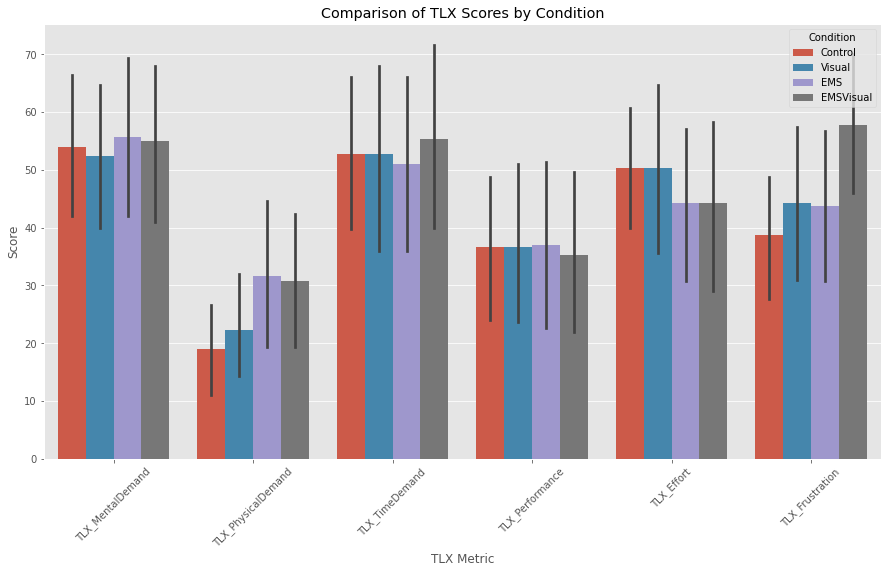

In [4]:
final_data_df = pd.read_csv('./final_data.csv')

# Get the UEQ columns grouped by the condition column
ueq_columns = [col for col in final_data_df.columns if col.startswith(
    'TLX')] + ['Condition']

plt.style.use('ggplot')
# Filter the DataFrame to only include the relevant columns
filtered_df = final_data_df[ueq_columns]
print(filtered_df)
# Print all rows with condition equals control
melted_df = filtered_df.melt(id_vars='Condition', var_name='Metric', value_name='Value')

# Create a bar plot using seaborn
plt.figure(figsize=(15, 8))
sns.barplot(x='Metric', y='Value', hue='Condition', data=melted_df)
plt.title('Comparison of TLX Scores by Condition')
plt.ylabel('Score')
plt.xlabel('TLX Metric')
plt.xticks(rotation=45)
plt.show()

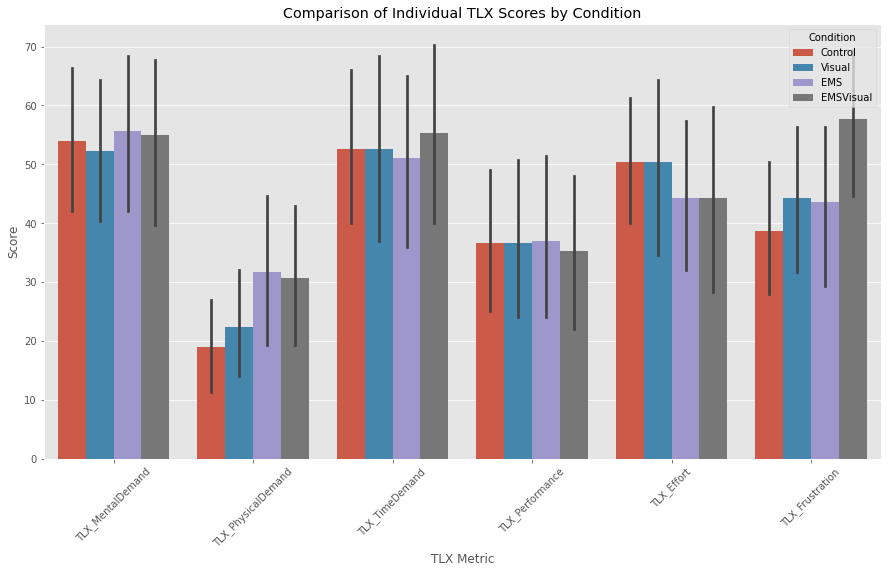

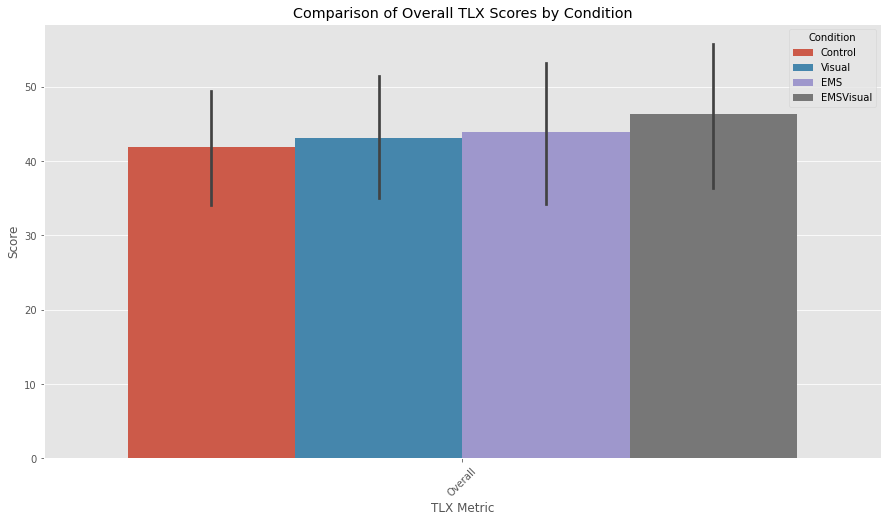

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the overall mean scores for each condition
overall_scores = filtered_df.drop(columns=['Condition']).mean(axis=1)
overall_df = pd.DataFrame({'Condition': filtered_df['Condition'], 'Overall': overall_scores})

# Melt the DataFrame for overall scores
melted_overall_df = overall_df.melt(id_vars='Condition', var_name='Metric', value_name='Value')

# Plot the individual TLX metrics
plt.figure(figsize=(15, 8))
sns.barplot(x='Metric', y='Value', hue='Condition', data=melted_df[melted_df['Metric'] != 'Overall'])
plt.title('Comparison of Individual TLX Scores by Condition')
plt.ylabel('Score')
plt.xlabel('TLX Metric')
plt.xticks(rotation=45)
plt.show()

# Plot the overall scores
plt.figure(figsize=(15, 8))
sns.barplot(x='Metric', y='Value', hue='Condition', data=melted_overall_df)
plt.title('Comparison of Overall TLX Scores by Condition')
plt.ylabel('Score')
plt.xlabel('TLX Metric')
plt.xticks(rotation=45)
plt.show()


In [12]:
import scipy.stats as stats

# Assuming the TLX scores are organized in the DataFrame filtered_df
for metric in ueq_columns[:-1]:
    # Get the data for the metric
    groups = [filtered_df[filtered_df['Condition'] == condition][metric] for condition in filtered_df['Condition'].unique()]

    # Perform one-way ANOVA
    f_statistic, p_value = stats.f_oneway(*groups)
    print(f"ANOVA test for {metric}: F = {f_statistic}, p = {p_value}")

ANOVA test for TLX_MentalDemand: F = 0.04375963868693544, p = 0.9876994301114543
ANOVA test for TLX_PhysicalDemand: F = 1.255902643870249, p = 0.2983366937332991
ANOVA test for TLX_TimeDemand: F = 0.0506643305592057, p = 0.9847751131933676
ANOVA test for TLX_Performance: F = 0.011211553600998994, p = 0.9983551124975144
ANOVA test for TLX_Effort: F = 0.2386740331491712, p = 0.8690136540014208
ANOVA test for TLX_Frustration: F = 1.5435064935064928, p = 0.21334680250965915


ANOVA test results indicate that there is no significant difference in the TLX scores (Mental Demand, Physical Demand, Time Demand, Performance, Effort, Frustration) across the conditions (p > 0.05 in all cases).

In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Example using Tukey's HSD for one of the TLX metrics
metric_data = filtered_df['TLX_Frustration']
condition_data = filtered_df['Condition']

tukey_result = pairwise_tukeyhsd(metric_data, condition_data)
print(tukey_result)


    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower    upper  reject
-----------------------------------------------------------
  Control       EMS      5.0 0.9487  -19.492  29.492  False
  Control EMSVisual     19.0  0.181   -5.492  43.492  False
  Control    Visual   5.6667 0.9276 -18.8253 30.1586  False
      EMS EMSVisual     14.0 0.4364  -10.492  38.492  False
      EMS    Visual   0.6667 0.9999 -23.8253 25.1586  False
EMSVisual    Visual -13.3333 0.4793 -37.8253 11.1586  False
-----------------------------------------------------------


The Tukey's HSD post-hoc test also shows that there are no significant differences between the means of any pair of groups, as indicated by the 'reject' column. In all cases, the null hypothesis that the means of the groups are equal is not rejected (False).

In [14]:
# Example using Kruskal-Wallis for one of the TLX metrics
metric_data = [filtered_df[filtered_df['Condition'] == condition]['TLX_Frustration'] for condition in filtered_df['Condition'].unique()]

h_statistic, p_value = stats.kruskal(*metric_data)
print(f"Kruskal-Wallis test: H = {h_statistic}, p = {p_value}")


Kruskal-Wallis test: H = 4.768806501519133, p = 0.1895304368471323


The Kruskal-Wallis test, a non-parametric alternative to ANOVA, also indicates no significant difference in the groups (p > 0.05).